In [81]:
# You are a data scientist working for a healthcare company, and you have been tasked with creating a
# decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
# given a dataset (diabetes.csv) with the following variables:
# 1. Pregnancies: Number of times pregnant (integer)
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
# 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
# 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
# 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
# 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
# 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
# based on family history) (float)
# 8. Age: Age in years (integer)
# 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
# 
# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
# understand the distribution and relationships between the variables.
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df.shape

(768, 9)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

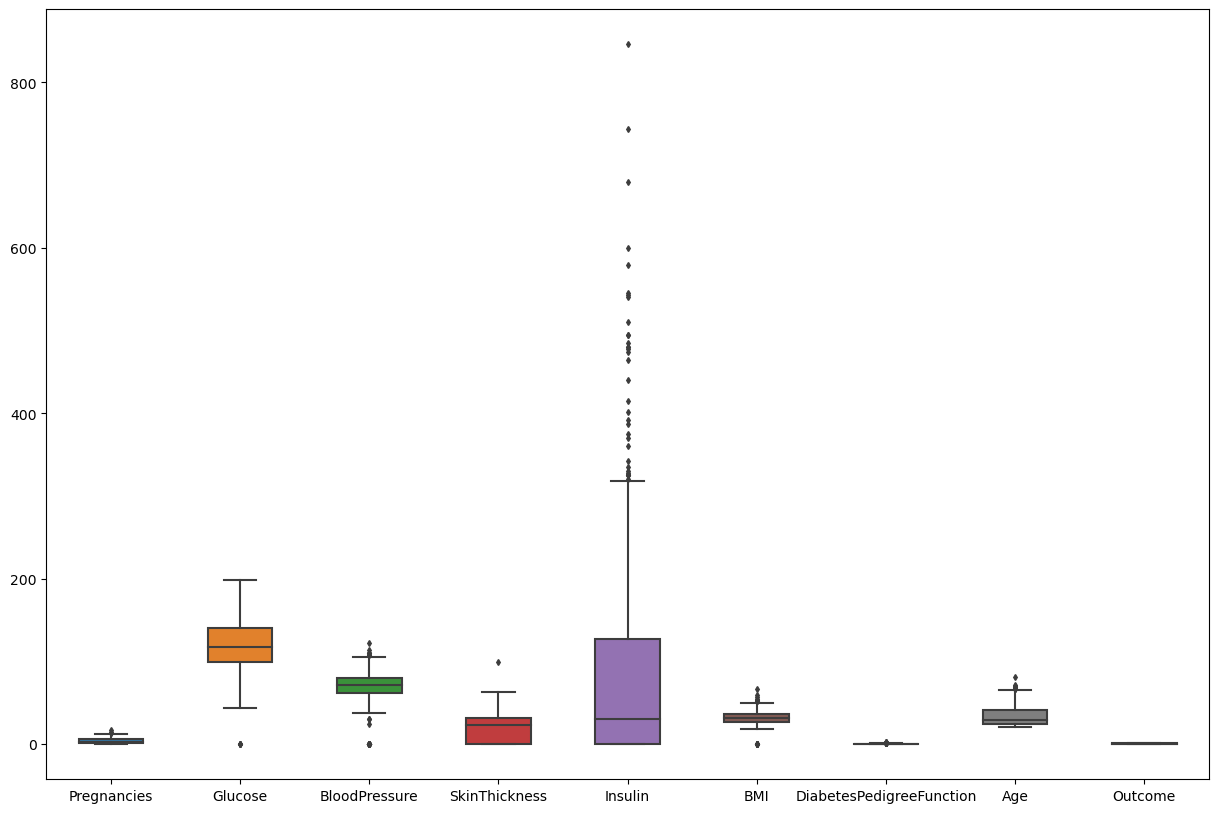

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,fliersize=3)

In [86]:
# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
# variables into dummy variables if necessary.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [88]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [89]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
X = df.drop(labels=['Outcome'],axis=1)
y = df['Outcome']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [92]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
# cross-validation to optimize the hyperparameters and avoid overfitting.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [93]:
parameter = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [None, 5, 10, 15, 20],
    'min_samples_split' : [2,4,5],
    'min_samples_leaf' : [1,2,3,4]
}

In [94]:
from sklearn.model_selection import GridSearchCV
GSCV = GridSearchCV(DecisionTreeClassifier(),param_grid=parameter,cv=3,verbose=3,scoring='accuracy')
GSCV.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.722 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=0.701 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=0.732 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=4;, score=0.701 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.727 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=0.722 total time= 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 5]},
             scoring='accuracy', verbose=3)

In [95]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [96]:
best_dtc = GSCV.best_estimator_
best_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=4)

In [97]:
y_pred = best_dtc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [98]:
# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score : 0.7792207792207793
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



Text(0.5, 1.0, 'Confusion Matrix')

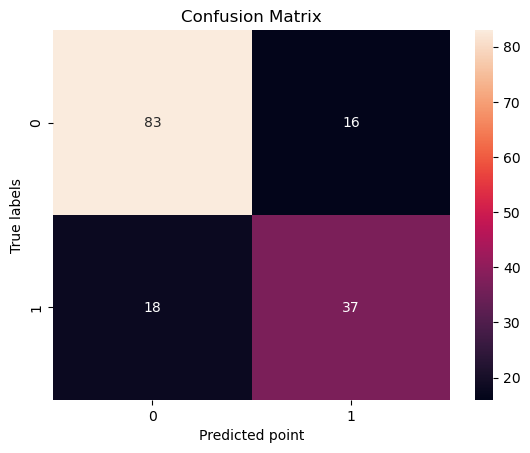

In [99]:
cnf = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf,annot=True)
plt.xlabel('Predicted point')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [100]:
from sklearn.metrics import roc_auc_score
y_pred_proba = GSCV.predict_proba(X_test)[:,-1]
auc = roc_auc_score(y_test,y_pred_proba)
auc

0.8049586776859504

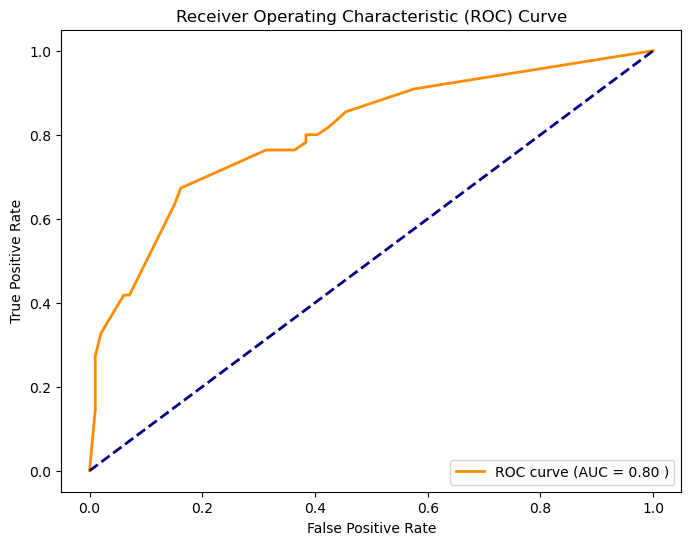

In [101]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f )'% auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

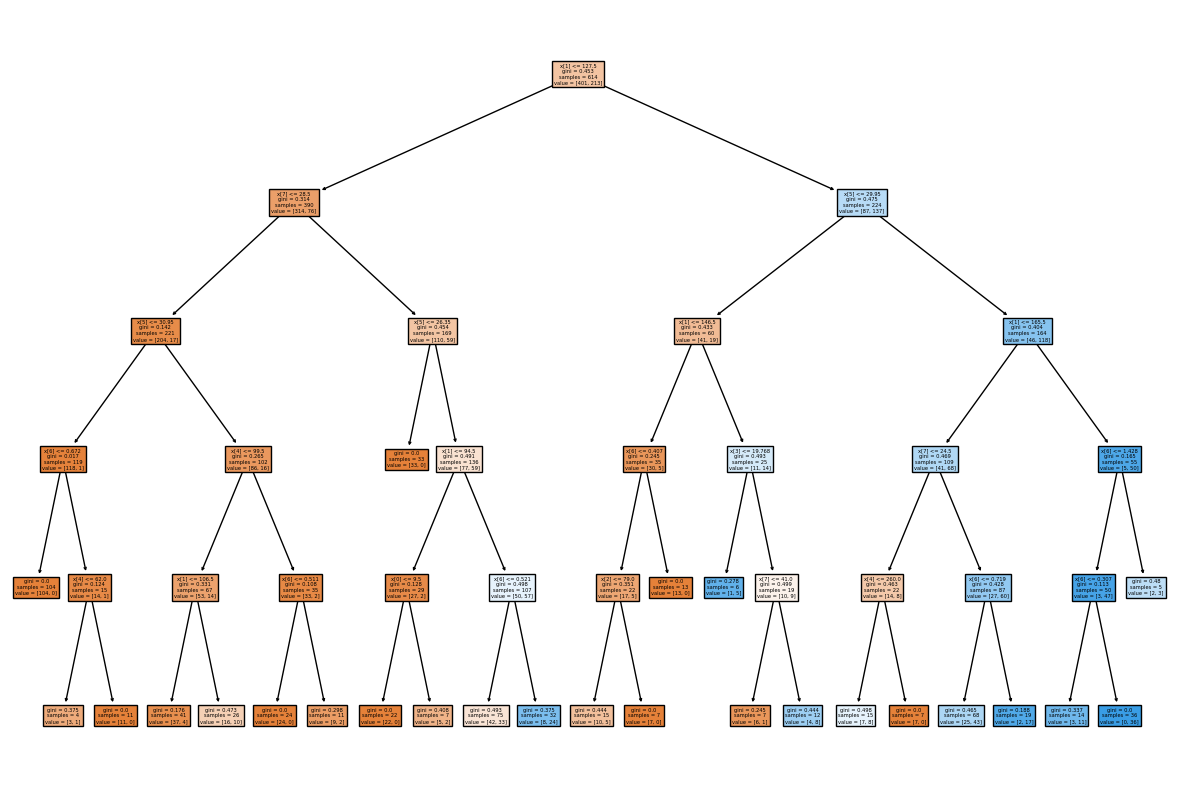

In [102]:
# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
# variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
# trends.
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_dtc,filled=True)
plt.show()

In [103]:
imp = best_dtc.feature_importances_
imp = pd.Series(imp)
imp.index = X_train.columns
imp = imp.sort_values(ascending = False)
imp

Glucose                     0.532181
BMI                         0.194788
Age                         0.148595
DiabetesPedigreeFunction    0.071503
Insulin                     0.030243
SkinThickness               0.008614
BloodPressure               0.007745
Pregnancies                 0.006331
dtype: float64

<AxesSubplot: title={'center': 'Feature Importance'}, ylabel='Importance'>

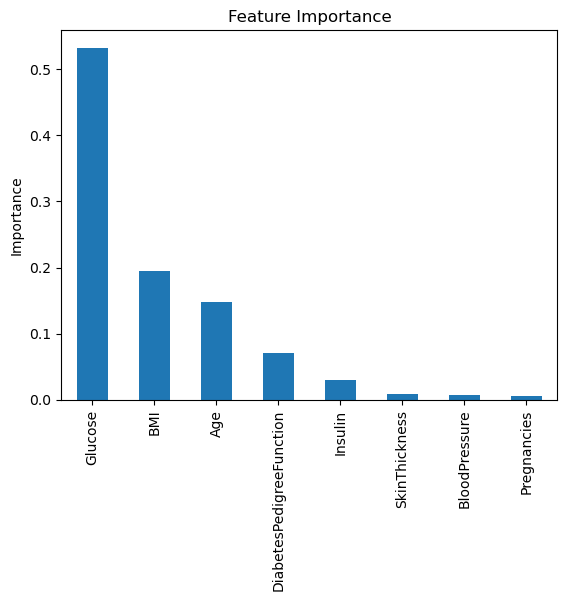

In [104]:
imp.plot(kind='bar',ylabel= 'Importance',title = 'Feature Importance')

In [105]:
# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
# dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
# risks.
# Here’s the dataset link:
# 
# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
# variables. Here are the steps you can follow:
# 
# https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?
# 
# usp=sharing
# 
# By following these steps, you can develop a comprehensive understanding of decision tree modeling and
# its applications to real-world healthcare problems. Good luck!

patient_data = {
    'Pregnancies':[0],
    'Glucose':[230],
    'BloodPressure':[100],
    'SkinThickness':[50],
    'Insulin':[432],
    'BMI':[65],
    'DiabetesPedigreeFunction':[0.120],
    'Age':[27]
}

In [106]:
df_data = pd.DataFrame(patient_data)
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,230,100,50,432,65,0.12,27


In [107]:
pred = best_dtc.predict(df_data)[0]
pred

1

In [108]:
if pred == 1:
    print('Patient is Diabetic')
    print('Probability of patient is Diabetic : ',best_dtc.predict_proba(df_data)[0][1])
else:
    print('Patient is Non-Diabetic')
    print('Probability of patient is Non-Diabetic : ',best_dtc.predict_proba(df_data)[0][1])

Patient is Diabetic
Probability of patient is Diabetic :  0.7857142857142857


In [109]:
!pip install lime

In [110]:
from lime.lime_tabular import LimeTabularExplainer
features = list(X_train.columns)
explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=features,
                                 class_names=[0,1],
                                 verbose=True,
                                 mode='classification')

In [116]:
from warnings import filterwarnings
filterwarnings('ignore')
exp = explainer.explain_instance(df_data.values.flatten(),best_dtc.predict_proba,num_features=X_train.shape[1])

Intercept 0.23726237887101811
Prediction_local [0.63944911]
Right: 0.7857142857142857
